In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import pandas as pd

In [2]:
engine = sqlalchemy.create_engine('sqlite:///' + 'SEC_Filings.db', execution_options={"sqlite_raw_colnames": True})
df_sentiments = pd.read_sql_table('Aggregated_Sentiment_Scores', engine)

In [3]:
aspect_counts=df_sentiments[['Industry', 'Aspect', 'Count']].groupby(['Industry', 'Aspect']).sum().values
df_sentiments['Total Sentiment'] = df_sentiments['Count']*df_sentiments['Aggregated Sentiment']

agg_sentiments = df_sentiments[['Industry', 'Aspect', 'Total Sentiment']].groupby(['Industry', 'Aspect']).sum()/aspect_counts
agg_sentiments.reset_index(drop=False, inplace=True)
agg_sentiments.rename(columns={'Total Sentiment': 'Average Sentiment'}, inplace=True)

In [4]:
df_sentiments['Total Mentions'] = df_sentiments['Count']*df_sentiments['Average Mentions']

agg_mentions = df_sentiments[['Industry', 'Aspect', 'Total Mentions']].groupby(['Industry', 'Aspect']).sum()/aspect_counts
agg_mentions.reset_index(drop=False, inplace=True)
agg_mentions.rename(columns={'Total Mentions': 'Average Mentions'}, inplace=True)

In [5]:
df_sentiments = agg_sentiments.merge(agg_mentions, on=['Industry', 'Aspect'])

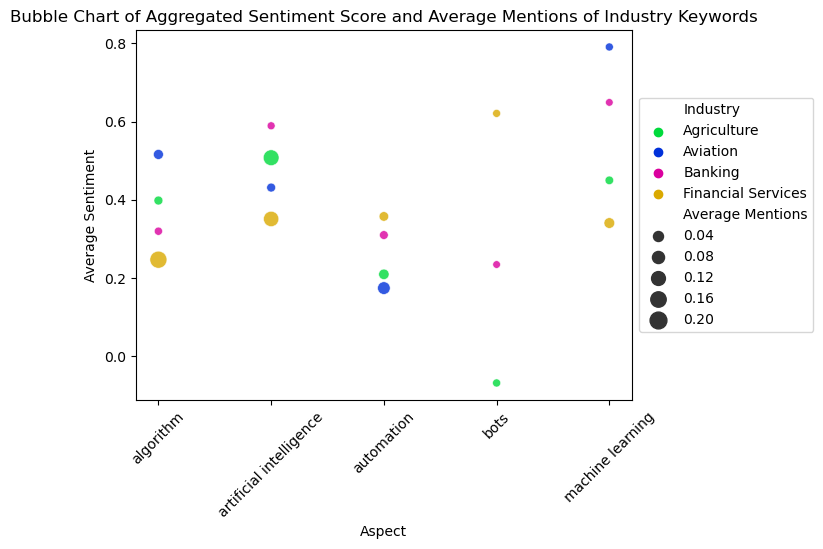

In [6]:
colors_hex = ['#00da3c', '#0031da', '#da009e', '#daa900']

ax = sns.scatterplot(data=df_sentiments, x="Aspect", y="Average Sentiment", size="Average Mentions", 
                palette=colors_hex, hue="Industry", legend=True, sizes=(30, 150), alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.title("Bubble Chart of Aggregated Sentiment Score and Average Mentions of Industry Keywords")
plt.show()